In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

In [ ]:
df = pd.read_csv('Exasens.csv', header=0, skiprows=[1])
df

,Diagnosis,ID,Imaginary Part,Unnamed: 3,Real Part,Unnamed: 5,Gender,Age,Smoking,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,Min,Avg.,Min,Avg.,NaN,NaN,NaN,NaN,NaN,Gender,Somking
1,COPD,301-4,-320.61,-300.5635307,-495.26,-464.1719907,1.0,77.0,2.0,NaN,NaN,Male=1,Non-smoker=1
2,COPD,302-3,-325.39,-314.7503595,-473.73,-469.2631404,0.0,72.0,2.0,NaN,NaN,Female=0,Ex-smoker=2
3,COPD,303-3,-323,-317.4360556,-476.12,-471.8976667,1.0,73.0,3.0,NaN,NaN,NaN,Active-smoker=3
4,COPD,304-4,-327.78,-317.3996698,-473.73,-468.856388,1.0,76.0,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Infected,I176,NaN,NaN,NaN,NaN,0.0,49.0,2.0,NaN,NaN,NaN,NaN
396,Infected,I177,NaN,NaN,NaN,NaN,0.0,37.0,1.0,NaN,NaN,NaN,NaN
397,Infected,I178,NaN,NaN,NaN,NaN,0.0,29.0,1.0,NaN,NaN,NaN,NaN
398,Infected,I179,NaN,NaN,NaN,NaN,1.0,51.0,1.0,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np


column_mapping = {
    'Imaginary Part': 'Imaginary_Part',
    'Unnamed: 3': 'Imaginary_Part_Avg',  # предположительно среднее значение
    'Real Part': 'Real_Part',
    'Unnamed: 5': 'Real_Part_Avg',
    'Gender': 'Gender',
    'Age': 'Age',
    'Smoking': 'Smoking',
    'Diagnosis': 'Diagnosis'
}

df.rename(columns=column_mapping, inplace=True)

feature_cols = ['Imaginary_Part', 'Imaginary_Part_Avg', 'Real_Part', 'Real_Part_Avg', 'Gender', 'Age', 'Smoking']
target_col = 'Diagnosis'

# оставляем только нужные столбцы
df = df[feature_cols + [target_col]]

# удалякм наны на фичах
original_rows = len(df)
df.dropna(subset=feature_cols, inplace=True)
deleted_rows = original_rows - len(df)

print(f"Удалено строк с NaN в features: {deleted_rows}/{original_rows}")
print(f"Осталось строк: {len(df)}")

Удалено строк с NaN в features: 300/400
Осталось строк: 100


/tmp/ipython-input-1379335304.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=feature_cols, inplace=True)


In [ ]:
X = df[feature_cols].copy()
y = df[target_col].copy()

X = X.to_numpy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#одномерный массив таргетов
y = y.to_numpy()


In [ ]:
X

array([['-320.61', '-300.5635307', '-495.26', '-464.1719907', 1.0, 77.0,
        2.0],
       ['-325.39', '-314.7503595', '-473.73', '-469.2631404', 0.0, 72.0,
        2.0],
       ['-323', '-317.4360556', '-476.12', '-471.8976667', 1.0, 73.0,
        3.0],
       ['-327.78', '-317.3996698', '-473.73', '-468.856388', 1.0, 76.0,
        2.0],
       ['-325.39', '-316.1557853', '-478.52', '-472.8697828', 0.0, 65.0,
        2.0],
       ['-327.78', '-318.6775535', '-507.23', '-469.0241943', 1.0, 60.0,
        2.0],
       ['-330.18', '-320.6174777', '-473.73', '-467.3618538', 1.0, 76.0,
        2.0],
       ['-320.61', '-307.5995856', '-476.12', '-470.1816328', 1.0, 74.0,
        2.0],
       ['-315.82', '-300.104765', '-473.73', '-466.3786343', 1.0, 67.0,
        2.0],
       ['-320.61', '-308.117898', '-471.34', '-466.13057', 1.0, 65.0,
        2.0],
       ['-318.21', '-306.2530384', '-471.34', '-466.5250462', 1.0, 75.0,
        2.0],
       ['-315.82', '-294.2698616', '-471.34', '-463

In [ ]:
X_float = []
for row in X:
    row_float = []
    for val in row:
        if isinstance(val, str):
            val_clean = val.strip().strip("'").strip('"')
            row_float.append(float(val_clean))
        else:
            row_float.append(float(val))
    X_float.append(row_float)

In [ ]:
X_float

[[-320.61, -300.5635307, -495.26, -464.1719907, 1.0, 77.0, 2.0],
 [-325.39, -314.7503595, -473.73, -469.2631404, 0.0, 72.0, 2.0],
 [-323.0, -317.4360556, -476.12, -471.8976667, 1.0, 73.0, 3.0],
 [-327.78, -317.3996698, -473.73, -468.856388, 1.0, 76.0, 2.0],
 [-325.39, -316.1557853, -478.52, -472.8697828, 0.0, 65.0, 2.0],
 [-327.78, -318.6775535, -507.23, -469.0241943, 1.0, 60.0, 2.0],
 [-330.18, -320.6174777, -473.73, -467.3618538, 1.0, 76.0, 2.0],
 [-320.61, -307.5995856, -476.12, -470.1816328, 1.0, 74.0, 2.0],
 [-315.82, -300.104765, -473.73, -466.3786343, 1.0, 67.0, 2.0],
 [-320.61, -308.117898, -471.34, -466.13057, 1.0, 65.0, 2.0],
 [-318.21, -306.2530384, -471.34, -466.5250462, 1.0, 75.0, 2.0],
 [-315.82, -294.2698616, -471.34, -463.1934272, 0.0, 56.0, 2.0],
 [-313.43, -299.0552022, -521.58, -421.1894102, 1.0, 75.0, 2.0],
 [-311.04, -297.9901, -466.55, -428.9503667, 0.0, 65.0, 2.0],
 [-323.0, -293.0287817, -466.55, -431.9906508, 1.0, 93.0, 2.0],
 [-308.64, -294.366142, -468.95, -4

In [ ]:
y

array(['COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD',
       'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD',
       'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD',
       'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD',
       'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD', 'COPD',
       'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC',
       'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC',
       'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC',
       'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'Asthma', 'Asthma',
       'Asthma', 'Asthma', 'Asthma', 'Asthma', 'Asthma', 'Asthma',
       'Asthma', 'Asthma', 'Infected', 'Infected', 'Infected', 'Infected',
       'Infected', 'Infected', 'Infected', 'Infected', 'Infected',
       'Infected'], dtype=object)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_float)

explained_variance_ratio = pca.explained_variance_ratio_
loss_variance = 1 - explained_variance_ratio.sum()
print(loss_variance)

0.10834582962813466


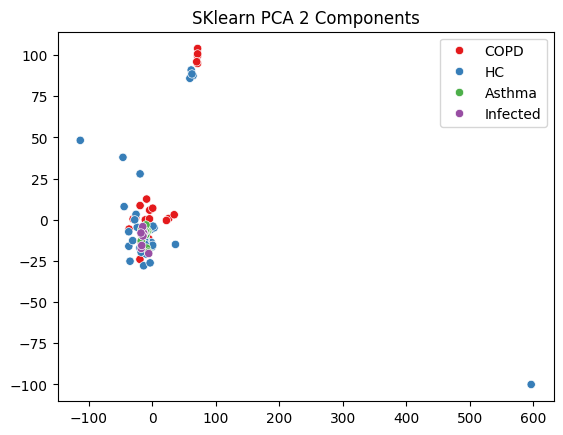

In [ ]:
colors = cm.Set1.colors
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=colors)
plt.title("SKlearn PCA 2 Components")
plt.show()

In [ ]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_float)

explained_variance_ratio = pca.explained_variance_ratio_
loss_variance = 1 - explained_variance_ratio.sum()
print(loss_variance)

0.04378608339966772


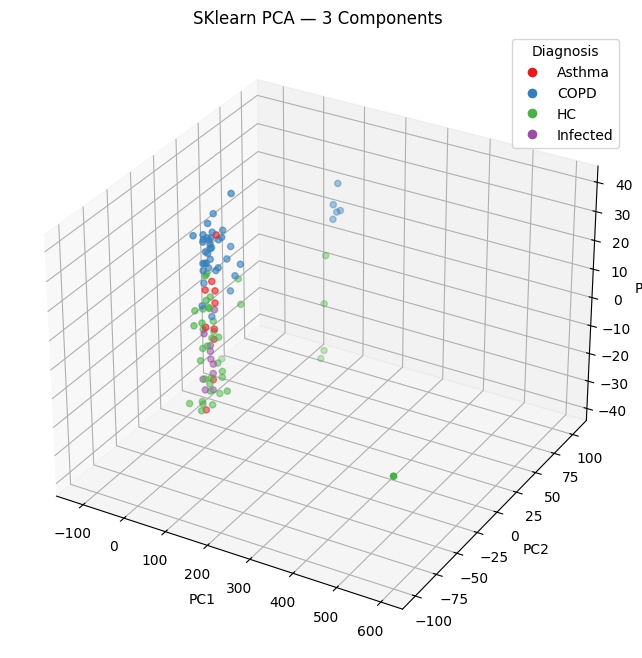

In [ ]:
unique_classes = np.unique(y)
class_to_color = {cls: i for i, cls in enumerate(unique_classes)}

# выбираем colormap
cmap = cm.Set1

# Преобразуем метки в цвета
# Set1 возвращает цвета в диапазоне [0,1], индексируем по числу
y_colors = [cmap(class_to_color[label]) for label in y]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_colors)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('SKlearn PCA — 3 Components')


handles = []
for cls in unique_classes:
    color = cmap(class_to_color[cls])
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=str(cls)))
ax.legend(handles=handles, title="Diagnosis")

plt.show()

In [ ]:
def pca(X: np.array, n_components: int):
    math_expectation = np.mean(X, axis=0)
    X_centered = X - math_expectation
    cov_matrix = np.cov(X_centered.T)
    eig_val, eig_vect = np.linalg.eig(cov_matrix)
    sort_indices = np.argsort(-eig_val)
    eig_val_sorted = eig_val[sort_indices]
    eig_vect_sorted = eig_vect[:, sort_indices]
    full_variance = np.sum(eig_val_sorted)
    compressed_variance = np.sum(eig_val_sorted[:n_components])
    loss = 1 - compressed_variance / full_variance
    X_pca = np.dot(X_centered, eig_vect_sorted[:, :n_components])
    return X_pca, loss

In [ ]:
X_pca, loss = pca(X_float, n_components=2)
print(loss)

0.10834582962811079


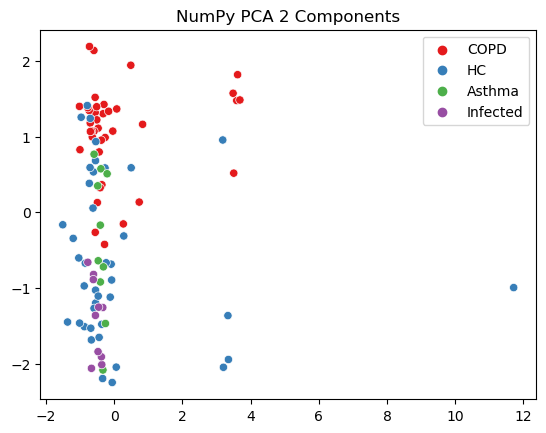

In [ ]:
colors = cm.Set1.colors
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=colors)
plt.title("NumPy PCA 2 Components")
plt.show()

In [ ]:
X_pca, loss = pca(X_float, n_components=3)
print(loss)

0.04378608339964862


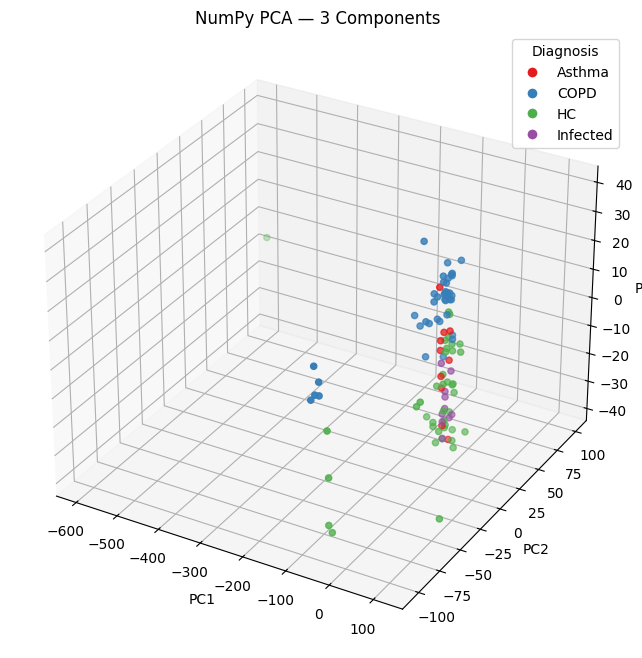

In [ ]:

unique_classes = np.unique(y)
class_to_color = {cls: i for i, cls in enumerate(unique_classes)}
y_colors = [cm.Set1(class_to_color[label]) for label in y]


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_colors)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('NumPy PCA — 3 Components')


handles = [
    plt.Line2D([0], [0], marker='o', color='w',
               markerfacecolor=cm.Set1(class_to_color[cls]), markersize=8, label=cls)
    for cls in unique_classes
]
ax.legend(handles=handles, title="Diagnosis")

plt.show()